In [1]:
#!user/bin/env python
# Author: Yuxin Qin
# Created: 2024-01
# File: Behavior_Kmeans.ipynb
# Email: qinyx3@mail2.sysu.edu.cn
# Usage: This file is used to separate the mice behavior stage by the method kmeans.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import random
from sklearn.decomposition import PCA 
import matplotlib.lines as mlines


In [3]:
# Basic information

# The total section
section = 10

# The mice number
female_num = 10
male_num = 10
mice_num = female_num + male_num

# The time point
time_vec = []
for i in range(section):
    time_vec.append(str(i+1) + 'min')
print(time_vec)

# The mice name
mice_vec = []
for i in range(female_num):
    mice_vec.append('Female'+ str(i+1))
for i in range(male_num):
    mice_vec.append('Male'+ str(i+1))
print(mice_vec)

['1min', '2min', '3min', '4min', '5min', '6min', '7min', '8min', '9min', '10min']
['Female1', 'Female2', 'Female3', 'Female4', 'Female5', 'Female6', 'Female7', 'Female8', 'Female9', 'Female10', 'Male1', 'Male2', 'Male3', 'Male4', 'Male5', 'Male6', 'Male7', 'Male8', 'Male9', 'Male10']


In [4]:
# read in the feature data and normalize it
data = pd.read_csv('./output_data/feature_data_accumulative_time.csv', index_col=0)
features = np.array(data)

# normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# calculate Silhouette scores for K ranging from 2 to 5
for i in range(2,6):
    print('K = ', i)
    estimator = KMeans(init="random", n_clusters=i, n_init=section*mice_num, max_iter=300,random_state=42)
    estimator.fit(scaled_features)
    r1 = pd.Series(estimator.labels_).value_counts()  
    r2 = pd.DataFrame(estimator.cluster_centers_)     
    r = pd.concat([r2, r1], axis = 1) 
    print(r)
    print("Silhouette scores for K = ", i , ": ",  metrics.silhouette_score(scaled_features, estimator.labels_, metric='euclidean'))

K =  2


C:\Users\Yuxin Qin\.conda\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          0         1         2         3         4         5         6  \
0 -0.631848 -0.643428 -0.697229 -0.466661 -0.455075  0.063806 -0.119544   
1  0.788036  0.802478  0.869578  0.582016  0.567565 -0.079579  0.149094   

          7         8         9    0  
0  0.239503 -0.310484 -0.101704  111  
1 -0.298706  0.387233  0.126844   89  
Silhouette scores for K =  2 :  0.21728016733733044
K =  3


C:\Users\Yuxin Qin\.conda\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          0         1         2         3         4         5         6  \
0  0.319672  1.016462  0.858052 -0.283559  1.103872 -0.677119  0.381108   
1  0.851702  0.328700  0.580433  1.032457 -0.084196  0.397822 -0.081326   
2 -0.739485 -0.791476 -0.866736 -0.516150 -0.570332  0.122907 -0.162647   

          7         8         9   0  
0  0.244408 -0.542033  0.745154  51  
1 -0.666156  1.025981 -0.296428  59  
2  0.298204 -0.365436 -0.227929  90  
Silhouette scores for K =  3 :  0.22205946160695267
K =  4


C:\Users\Yuxin Qin\.conda\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          0         1         2         3         4         5         6  \
0  0.253818  0.968576  0.927813 -0.270680  1.470866 -0.730871  0.202688   
1  0.674511  0.310069  0.464878  1.630052  0.049630 -0.048506 -0.321049   
2  0.137251  0.092295  0.008417 -0.330389 -0.415655  0.258358  0.832042   
3 -0.819951 -1.018797 -1.004399 -0.593392 -0.611035  0.261431 -0.866362   

          7         8         9   0  
0  0.274065 -0.534458  1.212360  40  
1 -0.446316  1.562795 -0.178163  40  
2 -0.553483 -0.278154 -0.529133  64  
3  0.755588 -0.416636 -0.133988  56  
Silhouette scores for K =  4 :  0.21310473343553063
K =  5


C:\Users\Yuxin Qin\.conda\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          0         1         2         3         4         5         6  \
0 -0.363458  0.075011 -0.209202 -0.455704 -0.214954 -0.486290  0.918361   
1 -0.851670 -1.081977 -1.061482 -0.603567 -0.665485  0.238498 -0.921358   
2  0.347407  0.329006  0.369447  2.213727  0.150984 -0.273362 -0.250068   
3  0.457153  1.208819  1.161978 -0.184434  1.799229 -0.701485  0.187125   
4  0.984689  0.173775  0.525616  0.238267 -0.283388  0.986383 -0.058677   

          7         8         9   0  
0 -0.075231 -0.415272 -0.254272  54  
1  0.831783 -0.418313 -0.175973  51  
2 -0.666002  2.176909 -0.118178  23  
3  0.192266 -0.515743  1.405306  30  
4 -0.685914  0.218144 -0.398471  42  
Silhouette scores for K =  5 :  0.21271744467427645


In [6]:
# set up the kmeans parameter and run it
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=section*mice_num,
    max_iter=300,
    random_state=42)
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_

# get the predicted cluster
predict = kmeans.labels_.reshape(mice_num, section)
predict_df = pd.DataFrame(predict, index = mice_vec,columns = time_vec)
print(predict_df)
# To undestand it easier, the direct output of Kmeans cluster number is not cooresponding to the cluster name in the paper. 
# 0 : Cluster 3, female-specific in the paper
# 1 : Cluter 2, male-specific in the paper
# 2 : Cluster 1, sex-shared in the paper

C:\Users\Yuxin Qin\.conda\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          1min  2min  3min  4min  5min  6min  7min  8min  9min  10min
Female1      2     0     0     0     0     0     0     0     0      0
Female2      2     2     0     0     0     0     0     0     0      0
Female3      2     2     2     0     0     0     0     0     0      0
Female4      2     2     2     2     2     2     2     0     0      0
Female5      2     2     2     2     2     2     0     0     0      0
Female6      2     2     2     2     0     0     0     0     0      0
Female7      2     2     2     2     2     0     0     0     0      0
Female8      2     2     2     2     2     2     2     2     2      0
Female9      2     2     2     2     2     2     0     0     0      0
Female10     2     2     2     2     2     2     0     0     0      0
Male1        2     2     2     1     1     1     1     1     1      1
Male2        2     2     2     1     1     1     1     1     1      1
Male3        2     2     2     2     2     2     2     1     1      1
Male4        2     2

In [7]:
# calculate the trasition minutes
mean_each_mice = []
for j in range(mice_num):
    for i in range(section-1):
        if predict[j, i+1] != predict[j, i]: 
            mean_each_mice.append(i+1)
print('The trasition time of each mice:')
print(mean_each_mice)

The trasition time of each mice:
[1, 2, 3, 7, 6, 4, 5, 9, 6, 6, 3, 3, 7, 3, 5, 4, 2, 4, 5, 5]


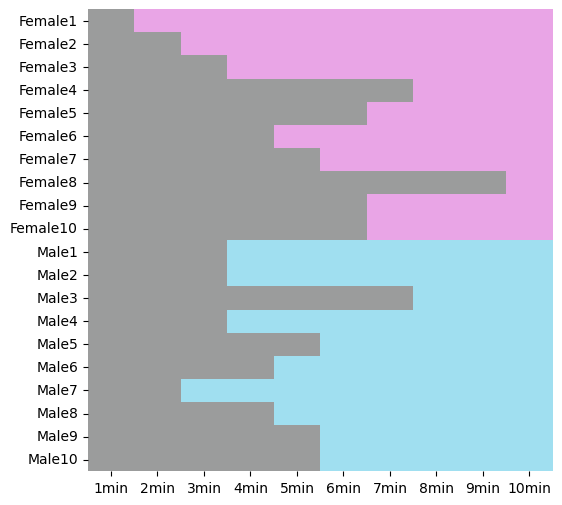

In [8]:
# Figure S1C : plot the heatmap of cluster
fig1 = plt.figure(figsize = (6,6))
sns.heatmap(predict_df,  cmap=['#E9A5E6','#A0DFF0', '#9B9C9C'], cbar= None)
fig1.savefig('Plots/FigureS1C.pdf')


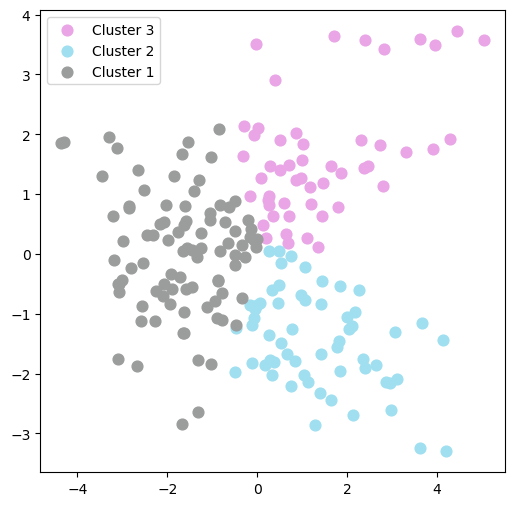

In [9]:
# Figure 1 D: kmeans cluster
pca = PCA(2) 
# Transform the data
df = pca.fit_transform(scaled_features)
# Get unique labels
u_labels = np.unique(kmeans.labels_)
label = kmeans.labels_
# Plot the results:    
fig2 = plt.figure(figsize = (6,6))
plt.scatter(df[label == 0 , 0] , df[label == 0 , 1] , label = 'Cluster 3', c = '#E9A5E6', s = 60)
plt.scatter(df[label == 1 , 0] , df[label == 1 , 1] , label = 'Cluster 2', c = '#A0DFF0', s = 60)
plt.scatter(df[label == 2 , 0] , df[label == 2 , 1] , label = 'Cluster 1', c = '#9B9C9C' , s = 60)
plt.legend()
plt.show()
fig2.savefig('Plots/PCA_kmeans_cluster.pdf')

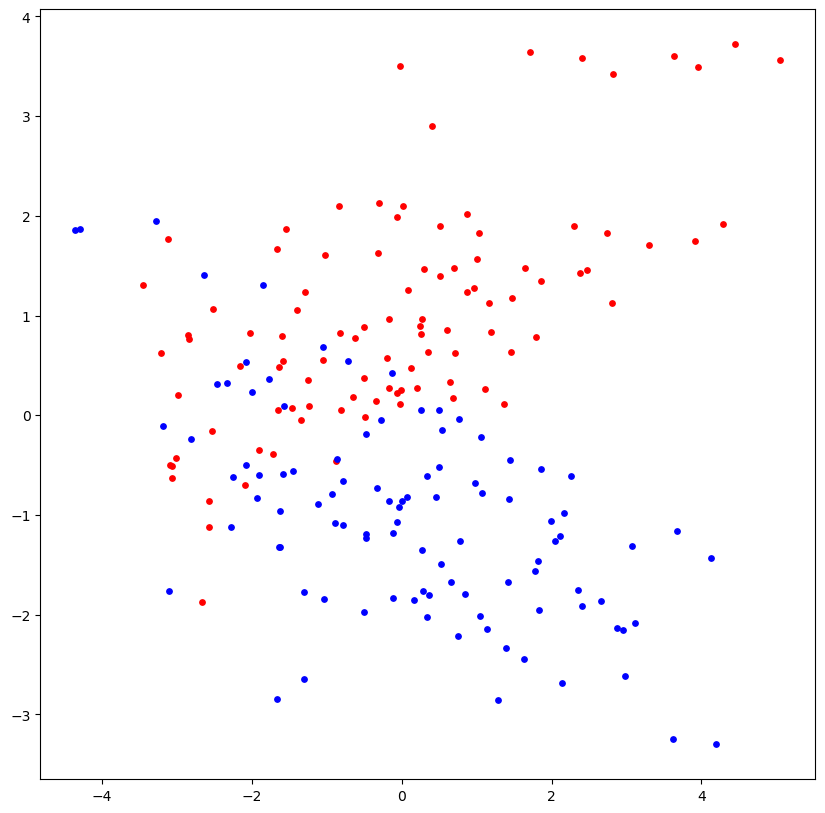

In [10]:
# Figure 1 D: sex
# label sex
sex1 = np.zeros((100,1), int)
sex2 = np.ones((100,1), int)
sex = np.vstack((sex1, sex2))
label_t = label.reshape(200,1)
add = np.hstack((label_t, sex))
df_new = np.hstack((df, add))

# function to plot
def color_func(val):
    val = int(val)
    color = '.'
    if val == 0:
        color = 'r'
    if val == 1:
        color = 'b'
    return color

# plot
fig3 = plt.figure(figsize = (10,10))

for i in range(200):
    plt.scatter(df_new[i , 0] , df_new[i , 1], c = color_func(df_new[i, 3]), s=15)
plt.show()

# save
fig3.savefig('Plots/PCA_sex.pdf')
